<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-24 06:01:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.112, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   322MB/s    in 0.3s    

2022-06-24 06:01:52 (322 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



#Model

In [ ]:
#input (batch, rows, columns, channel)
#Conv2D (batch, new_rows, new_columns, filters)
#MaxPool2D  (batch, pooled_rows, pooled_columns, channel)
#Flatten  (batch, multi-all)  #GlobalMaxPool2D (batch, channel)
#Dense (batch, units)

In [ ]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Compile the model
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


In [ ]:
# Fit the model
history = model.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 32s 429ms/step - loss: 0.6711 - accuracy: 0.5807 - val_loss: 0.7083 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5818 - accuracy: 0.6933 - val_loss: 0.4293 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4272 - accuracy: 0.8067 - val_loss: 0.3490 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3688 - accuracy: 0.8433 - val_loss: 0.2996 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2941 - accuracy: 0.8853 - val_loss: 0.2804 - val_accuracy: 0.8700


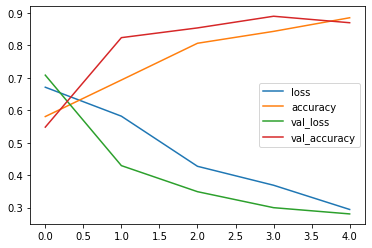

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.save("model.h5")